In [3]:
import pandas as pd
import numpy as np
import math

In [4]:
from scipy.sparse import csr_matrix

In [5]:
wiki = pd.read_csv('people_wiki.csv')

In [6]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)

In [37]:
word_count = load_sparse_csr('people_wiki_word_count.npz')

### Check CountVectorizier

In [24]:
wiki.columns

Index(['URI', 'name', 'text'], dtype='object')

## Find nearest neighbors using word count vectors

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [27]:
print (wiki[wiki['name'] == 'Barack Obama'])

                                              URI          name  \
35817  <http://dbpedia.org/resource/Barack_Obama>  Barack Obama   

                                                    text  
35817  barack hussein obama ii brk husen bm born augu...  


In [28]:
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10)

In [29]:
print (distances, indices)

[[ 0.         33.07567082 34.39476704 36.15245497 36.16628264 36.33180425
  36.40054945 36.49657518 36.63331817 36.95943723]] [[35817 24478 28447 35357 14754 13229 31423 22745 36364  9210]]


In [30]:
neighbors = pd.DataFrame({'distance': distances.flatten(), 'id': indices.flatten()})

In [31]:
wiki

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,sam henderson born october 18 1969 is an ameri...
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...
7,<http://dbpedia.org/resource/Trevor_Ferguson>,Trevor Ferguson,trevor ferguson aka john farrow born 11 novemb...
8,<http://dbpedia.org/resource/Grant_Nelson>,Grant Nelson,grant nelson born 27 april 1971 in london also...
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...


In [32]:
pd.merge(neighbors, wiki, how='left', left_on='id', right_index=True)

,distance,id,URI,name,text
0,0.000000,35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...
1,33.075671,24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...
2,34.394767,28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...
3,36.152455,35357,<http://dbpedia.org/resource/Lawrence_Summers>,Lawrence Summers,lawrence henry larry summers born november 30 ...
4,36.166283,14754,<http://dbpedia.org/resource/Mitt_Romney>,Mitt Romney,willard mitt romney born march 12 1947 is an a...
5,36.331804,13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...
6,36.400549,31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...
7,36.496575,22745,<http://dbpedia.org/resource/Wynn_Normington_H...,Wynn Normington Hugh-Jones,sir wynn normington hughjones kb sometimes kno...
8,36.633318,36364,<http://dbpedia.org/resource/Don_Bonker>,Don Bonker,don leroy bonker born march 7 1937 in denver c...
9,36.959437,9210,<http://dbpedia.org/resource/Andy_Anstett>,Andy Anstett,andrue john andy anstett born june 25 1946 is ...


## Interpreting the nearest neighbors

In [33]:
word_count[35817]

<1x547979 sparse matrix of type '<class 'numpy.int64'>'
	with 273 stored elements in Compressed Sparse Row format>

In [121]:
map_index_to_word_tmp = pd.read_json('people_wiki_map_index_to_word.json', typ='series')

In [125]:
map_index_to_word = dict(zip(map_index_to_word_tmp.values, map_index_to_word_tmp.index))

In [133]:
def unpack_dict(matrix, table):
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in range(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [290]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = pd.DataFrame({"count": row['word_count'].values[0]})
    word_count_table['word'] = word_count_table.index
    word_count_table = word_count_table.reset_index(drop=True)
#     word_count_table = word_count_table.set_index('word')
    
    return word_count_table.sort_values('count', ascending=False)

obama_words = top_words('Barack Obama')
print (obama_words)

barrio_words = top_words('Francisco Barrio')
print (barrio_words)

     count         word
245     40          the
118     30           in
31      21          and
165     18           of
248     14           to
109     11          his
163      9        obama
21       8          act
20       7            a
107      7           he
33       6           as
259      6           us
136      6          law
263      5          was
27       4        after
77       4   democratic
63       4      control
126      4         iraq
182      4    president
94       4          for
149      4     military
105      4          has
268      3         with
242      3         term
177      3        party
93       3        first
220      3       school
226      3       signed
172      3      ordered
129      3      january
..     ...          ...
122      1  initiatives
120      1     included
78       1     district
119      1  inaugurated
79       1    doddfrank
82       1         down
84       1      earning
85       1     economic
87       1   elementary
88       1      

In [264]:
obama_words

,count
word,
the,40
in,30
and,21
of,18
to,14
his,11
obama,9
act,8
a,7


In [294]:
combined_words = obama_words.merge(barrio_words, how='left', on='word', suffixes=('_obama', '_barrio'))

In [296]:
combined_words.sort_values('count_obama', inplace=True, ascending=False)

In [299]:
combined_words.head(n=15)

,count_obama,word,count_barrio
0,40,the,36.0
1,30,in,17.0
2,21,and,18.0
3,18,of,24.0
4,14,to,9.0
5,11,his,5.0
6,9,obama,NaN
7,8,act,NaN
9,7,he,10.0
8,7,a,6.0


### Quiz Question. Among the words that appear in both Barack Obama and Francisco Barrio, take the 5 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?



In [331]:
common_words = set(combined_words[combined_words['count_barrio'].isnull() == False][0:5]['word'].tolist())
common_words

{'and', 'in', 'of', 'the', 'to'}

In [332]:
'and' in most_frequent_words

True

In [456]:
def has_top_words(word_count_vector, top_words=common_words):
    unique_words = word_count_vector.keys()
    print (len(unique_words))
    return top_words.issubset(unique_words)

In [457]:
wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

139
147
144
227
114
173
265
306
173
130
144
192
133
170
270
134
128
123
138
172
119
169
294
249
198
203
140
163
190
155
172
126
167
188
157
150
158
216
138
128
148
179
143
146
187
156
133
180
139
138
151
162
465
151
164
145
126
166
244
154
175
142
132
142
216
168
137
152
150
133
171
187
186
130
184
132
137
126
135
164
110
162
319
222
142
137
155
187
213
129
135
136
138
300
181
274
170
134
177
151
165
181
207
301
161
140
149
179
230
149
152
144
143
148
175
120
135
155
127
212
160
172
125
184
266
213
236
133
163
125
148
159
132
160
160
208
226
125
127
149
133
173
138
193
167
132
172
121
173
191
223
248
135
190
226
226
132
216
165
123
226
130
169
175
150
163
205
157
291
119
250
261
155
149
123
181
144
189
116
227
215
129
115
187
188
147
180
155
330
291
158
144
264
147
134
214
120
165
136
177
202
141
206
126
131
209
219
153
129
127
203
128
137
256
215
348
208
167
210
168
188
134
143
204
534
146
176
206
137
173
134
193
127
140
179
358
235
129
138
168
132
151
182
183
183
207
225
188
300
187


277
261
129
281
112
185
181
238
152
156
193
139
226
139
145
117
569
224
161
164
262
141
135
370
134
159
135
244
111
162
173
142
142
230
200
145
170
128
140
175
123
169
464
85
127
123
166
123
208
170
198
187
197
135
128
113
271
151
146
208
289
148
126
138
153
132
170
147
113
333
136
188
167
147
158
153
120
169
141
226
160
214
196
162
143
165
163
134
167
198
145
180
186
195
169
141
128
138
148
161
195
315
249
149
122
117
225
153
108
134
158
196
140
171
262
133
140
136
259
119
145
386
128
129
223
131
131
222
134
212
147
128
165
135
126
204
148
157
156
124
169
185
138
207
232
173
133
134
139
158
134
128
130
221
159
133
124
138
212
152
195
138
149
122
155
155
162
147
159
137
159
141
187
264
169
182
204
186
180
115
266
151
223
143
238
168
189
134
137
179
250
192
130
287
142
95
254
164
137
228
133
128
194
185
145
137
137
331
293
254
160
223
148
134
122
123
141
165
148
127
128
127
178
178
130
176
157
143
181
136
136
491
164
172
146
280
203
126
143
262
184
225
149
162
178
296
140
132
142
202
20

150
190
173
153
140
140
124
171
155
153
136
141
136
132
241
228
169
158
376
147
156
178
206
217
127
172
271
165
126
186
238
190
177
137
159
135
136
166
131
181
153
151
125
180
226
267
159
151
193
196
229
190
149
145
158
170
128
364
159
129
174
166
180
184
183
139
175
197
143
248
258
279
223
230
156
232
201
264
134
237
144
155
160
166
240
147
295
146
250
127
211
180
113
178
116
132
130
112
136
127
116
146
147
174
172
122
195
177
163
225
133
139
221
221
165
118
141
272
136
101
138
140
162
171
193
254
138
128
217
175
156
140
228
148
125
147
144
149
162
139
157
170
181
172
123
290
196
132
132
120
149
140
137
116
171
151
133
199
139
198
208
160
132
164
200
169
230
144
168
268
130
173
190
161
158
156
132
157
136
328
226
139
192
117
167
176
118
264
130
193
194
188
147
206
119
140
141
176
228
159
126
153
163
136
148
206
135
196
132
192
170
260
178
256
183
224
137
130
138
122
187
191
131
160
163
219
185
334
106
155
133
159
214
143
121
158
135
130
390
152
119
128
153
103
161
129
166
133
145
133


102
148
118
139
176
221
173
332
143
173
139
125
128
160
164
147
191
137
151
220
151
209
124
120
127
192
136
165
125
231
241
210
234
127
180
180
168
189
250
135
105
150
211
172
166
208
212
156
148
143
184
155
134
131
131
155
124
177
183
137
249
135
192
167
131
207
188
177
162
372
147
215
220
164
223
119
158
203
166
142
122
190
170
175
139
149
186
129
127
189
106
143
204
129
443
150
201
141
202
119
123
159
200
218
160
249
146
195
171
145
196
200
123
137
140
170
128
136
173
135
149
177
192
152
173
133
132
127
142
149
164
142
128
144
141
185
146
151
148
150
151
145
199
204
180
141
149
161
103
268
152
144
130
127
204
179
258
236
164
159
196
145
192
133
224
363
110
283
143
125
200
259
267
154
159
135
186
198
139
168
129
145
138
226
181
210
140
212
142
224
142
165
143
202
141
197
127
126
240
142
147
234
122
147
142
236
144
146
120
131
154
150
116
111
195
126
195
250
261
115
241
185
111
162
148
151
169
145
228
180
131
196
128
273
223
149
171
132
134
172
188
128
249
216
164
152
126
163
117
134


216
165
206
175
175
150
125
203
178
116
147
491
147
128
172
157
264
136
131
125
123
328
165
199
199
200
117
167
218
248
176
130
175
150
295
126
154
144
148
168
95
195
149
245
182
457
152
134
146
159
155
135
154
163
240
244
166
133
135
140
164
311
193
133
107
115
160
196
153
195
165
175
128
179
225
303
178
216
160
127
143
150
126
136
190
159
120
321
249
133
170
150
142
113
133
158
190
485
119
122
149
129
163
142
187
254
157
182
193
240
454
194
236
239
154
206
149
199
177
135
162
159
129
268
132
185
116
114
165
258
146
117
181
162
207
139
165
141
123
255
127
206
159
127
130
225
162
174
241
129
380
131
248
132
132
163
152
154
161
186
153
177
225
169
210
171
202
179
135
128
205
163
104
130
115
138
123
123
151
198
137
112
132
188
133
118
138
130
203
143
194
169
145
183
158
178
138
189
221
486
251
140
166
205
121
147
233
303
170
191
131
130
185
131
191
130
130
182
149
140
291
164
133
212
130
132
143
148
135
161
206
122
126
188
169
173
145
362
109
122
185
150
134
141
207
147
131
383
191
136
1

234
99
154
139
265
178
132
232
197
170
320
253
186
138
125
149
205
178
183
108
171
136
126
170
246
167
140
157
164
204
186
109
149
243
171
130
158
157
154
208
124
125
188
131
158
144
176
251
140
227
379
188
122
138
127
137
185
253
141
178
141
180
161
135
165
196
193
219
151
118
106
146
128
133
152
366
150
123
143
255
134
182
127
251
137
190
197
182
167
159
214
168
123
221
203
167
167
256
153
153
207
195
157
131
309
187
188
145
131
182
150
135
137
156
120
160
188
153
118
219
212
323
184
191
123
258
136
148
168
160
111
153
181
110
168
193
199
200
136
173
125
178
200
172
132
230
153
160
224
130
157
138
211
161
144
128
135
174
124
162
202
145
171
141
201
139
128
180
184
155
187
207
253
219
171
222
133
187
153
119
194
314
131
250
198
147
199
163
226
149
204
171
188
157
234
146
164
131
253
127
130
134
178
122
196
127
133
169
187
179
119
229
133
125
477
200
139
148
193
123
138
181
168
201
189
352
204
151
186
158
172
140
180
125
356
173
206
132
109
171
147
164
157
166
261
159
162
143
154
190
2

204
161
138
173
152
170
301
130
106
124
159
132
142
127
181
131
115
160
193
172
162
144
182
231
212
120
193
150
137
110
306
150
138
152
190
184
185
156
148
139
136
126
115
150
169
143
123
130
108
183
254
158
143
135
191
121
261
149
152
207
119
132
172
189
198
157
197
298
127
133
217
165
269
137
170
137
154
383
126
151
150
106
150
112
158
213
184
176
131
117
128
153
122
131
160
158
101
165
163
152
158
212
142
256
112
220
176
164
138
169
236
288
149
115
185
227
205
196
167
614
128
140
228
157
236
288
251
148
271
160
159
129
224
235
140
178
198
179
157
148
172
132
261
192
209
232
118
127
116
178
142
200
159
211
125
143
239
139
128
123
151
230
160
113
118
303
178
167
341
167
191
135
117
158
173
300
215
142
175
184
348
145
120
263
293
141
231
191
145
162
176
283
271
251
134
161
129
122
234
132
186
157
180
126
225
144
109
149
293
124
265
151
256
263
159
182
160
158
148
179
120
164
164
238
131
167
200
136
175
183
181
113
134
136
175
157
138
149
200
133
169
110
142
173
206
187
196
174
184
172


181
123
213
244
154
249
193
197
154
155
197
151
141
135
139
130
132
262
135
151
152
139
413
150
150
234
166
147
136
151
117
157
129
356
119
165
192
314
177
169
171
149
129
152
228
132
171
170
132
144
133
148
131
222
256
142
112
283
258
219
224
138
179
188
124
134
335
186
136
192
222
126
115
147
208
147
349
159
180
166
215
168
540
228
148
175
120
208
155
160
165
192
135
138
128
135
222
149
182
166
152
274
191
211
140
175
133
253
299
152
115
185
129
317
197
129
164
280
187
367
130
143
179
159
127
118
258
158
140
240
306
161
218
116
153
281
155
170
160
269
199
195
158
189
145
179
127
147
138
119
141
126
182
142
189
120
317
146
139
211
208
169
137
204
131
142
219
157
267
129
218
179
141
221
164
189
203
124
170
256
153
137
149
161
142
172
197
157
177
137
138
166
194
252
215
226
151
251
194
167
137
114
158
160
197
138
215
128
263
160
188
159
194
210
128
148
382
143
158
209
172
244
381
146
160
231
143
137
132
178
175
156
209
167
131
154
148
107
208
144
196
195
116
188
178
184
497
136
141
138


126
155
158
146
133
126
249
183
146
205
167
125
119
98
224
596
130
127
259
136
162
155
275
167
200
135
141
165
219
118
313
192
164
136
142
164
276
180
149
146
128
124
162
132
142
197
156
123
208
188
177
141
132
211
158
162
455
145
125
177
163
334
158
135
134
128
189
148
206
164
141
133
122
173
174
146
153
258
127
194
148
188
414
147
197
184
558
132
187
160
120
219
203
273
131
164
130
236
116
125
272
168
158
313
134
158
229
137
135
161
157
138
189
151
115
140
219
219
115
105
182
226
190
200
126
332
148
160
152
128
149
196
189
132
145
192
216
126
111
147
309
175
139
99
140
206
110
184
264
145
161
224
140
188
137
142
179
133
140
192
159
153
253
443
138
144
169
266
159
170
174
189
176
143
156
128
170
365
140
247
202
140
133
202
164
299
208
155
211
203
173
174
180
201
138
137
118
358
122
131
126
130
128
136
140
147
141
168
126
153
215
126
274
156
122
141
151
155
192
141
155
154
295
169
240
110
201
147
187
173
162
218
138
232
195
159
133
275
255
119
140
187
168
119
166
154
238
138
157
186
12

162
161
170
171
194
217
135
152
136
110
129
133
145
126
107
198
138
232
185
158
158
117
132
208
148
136
161
227
150
145
137
151
111
131
228
104
159
330
137
190
190
184
204
162
218
192
178
119
156
125
208
179
175
155
177
128
321
151
179
136
118
149
150
132
116
142
279
171
129
169
176
184
157
152
145
124
113
118
260
165
166
124
371
214
146
234
181
125
148
198
175
136
154
187
118
140
199
141
131
192
128
165
151
195
137
127
149
178
180
127
195
148
136
241
139
144
178
210
128
255
215
145
203
190
130
143
148
135
135
175
170
135
159
240
134
237
158
230
125
122
162
146
131
151
125
158
226
149
169
136
173
185
228
155
177
199
142
142
255
150
145
194
134
178
118
134
157
136
159
131
145
163
133
175
136
181
129
167
145
187
160
154
155
131
129
129
301
154
137
114
157
155
117
172
153
233
236
221
160
217
173
119
151
162
381
128
132
154
170
121
129
136
149
169
178
136
127
191
140
123
133
149
127
126
184
168
179
128
149
145
138
179
178
470
144
158
136
169
133
182
162
150
126
179
245
146
146
120
157
240


128
157
144
185
146
159
113
122
195
247
150
119
127
193
133
156
208
252
283
138
185
132
164
208
137
149
204
152
176
247
145
183
148
155
165
150
248
184
148
142
167
185
133
136
120
412
134
141
141
193
175
148
205
146
140
206
309
170
141
123
142
128
122
142
198
284
301
203
463
154
174
213
126
161
144
158
137
132
145
188
176
141
154
129
195
289
135
148
168
178
173
191
105
141
143
134
140
153
134
214
134
200
120
110
134
116
326
123
177
294
206
249
131
216
168
216
148
132
160
177
180
119
199
176
184
128
129
134
295
182
165
163
132
194
324
201
225
251
236
142
180
157
180
208
201
126
146
174
183
232
193
152
127
238
158
163
199
120
150
158
154
117
205
186
200
139
148
124
135
178
154
130
166
126
159
141
169
226
152
329
116
126
193
191
171
175
114
132
316
265
211
182
162
232
123
271
201
150
105
174
178
154
174
144
153
197
191
131
152
137
155
113
159
315
170
187
171
119
143
178
146
156
158
289
178
287
134
136
168
156
212
193
138
116
111
135
130
199
146
155
445
175
147
120
231
115
205
124
152
173


141
193
265
169
145
141
136
172
240
137
151
155
198
225
188
334
98
172
230
169
316
167
167
190
332
164
223
262
171
121
204
181
167
414
181
279
103
237
152
163
110
159
176
125
271
112
149
113
159
135
129
158
226
130
263
106
131
125
142
106
155
160
152
311
176
120
113
160
147
149
170
301
153
118
191
232
174
176
155
164
113
156
138
230
153
132
131
135
106
195
169
120
137
192
232
265
220
322
154
237
220
171
120
142
178
193
142
155
193
148
142
155
166
141
167
132
142
139
164
119
118
143
135
222
199
200
202
373
210
203
242
136
117
142
242
270
124
136
146
140
217
157
381
142
143
131
176
233
144
229
216
229
129
179
123
119
214
133
156
136
158
177
142
154
143
229
216
135
163
122
285
127
127
245
158
204
143
137
195
181
183
135
121
154
211
194
167
245
148
144
135
349
127
178
331
201
124
143
194
164
130
246
292
249
223
123
160
138
173
176
153
175
155
156
178
156
134
177
164
149
141
183
115
215
188
132
145
158
143
204
185
168
171
138
229
127
134
194
183
154
134
126
193
165
189
133
136
157
286
122
2

139
210
148
140
163
200
207
185
485
174
135
157
250
168
133
108
221
213
150
143
127
112
201
128
254
186
176
205
148
202
146
131
205
120
280
188
178
203
133
178
135
243
120
153
134
141
199
154
176
124
156
167
160
106
181
138
176
249
143
142
185
116
118
250
130
150
135
129
129
345
154
128
243
198
232
216
158
165
135
196
313
153
221
154
281
163
163
137
174
164
143
165
186
128
302
128
197
120
193
347
245
180
272
154
178
141
190
156
240
132
126
232
214
227
196
139
148
116
202
135
214
166
216
145
241
208
305
118
291
208
157
187
122
165
130
144
168
131
133
165
169
209
136
228
263
175
204
116
144
245
148
141
217
172
121
140
202
153
136
142
244
173
162
128
148
126
208
130
127
179
128
122
175
143
161
128
154
112
200
210
165
166
140
136
183
179
269
159
163
172
161
130
218
377
149
187
126
166
162
140
129
154
124
180
103
236
245
373
161
136
125
283
169
144
125
155
247
188
144
196
137
259
178
161
155
172
211
136
221
196
234
155
172
276
131
154
242
163
103
239
171
107
211
130
128
211
395
311
177
189


312
214
156
107
154
136
187
157
136
260
230
308
113
194
151
140
288
128
132
224
144
136
130
298
129
128
169
136
247
163
136
259
184
202
201
141
138
234
132
248
456
133
184
130
154
154
173
135
150
115
215
229
267
127
139
160
120
232
163
116
160
283
231
157
116
153
130
169
151
134
125
167
134
141
411
161
125
243
146
264
139
108
121
184
133
145
145
247
167
150
120
130
113
186
159
127
136
194
203
216
185
157
170
154
144
162
329
151
141
229
336
140
218
161
149
201
127
147
190
191
167
206
185
117
193
169
152
132
158
215
171
135
127
176
126
218
204
128
194
164
182
202
365
124
194
143
183
223
227
158
198
180
122
122
145
114
243
148
288
165
169
161
168
159
189
150
189
166
191
215
193
256
140
174
175
164
145
137
144
172
200
235
162
204
140
134
211
152
120
134
226
188
152
128
319
181
161
165
99
136
130
327
148
165
202
158
142
125
119
164
177
293
120
128
137
153
266
175
126
123
152
178
121
191
112
175
155
205
199
138
147
216
209
150
135
164
268
185
135
134
154
267
164
192
135
332
147
136
185
259
1

157
129
210
297
161
135
182
275
184
159
191
175
145
129
175
142
166
420
134
149
114
625
168
152
143
142
142
178
132
231
119
232
112
161
159
168
153
143
204
143
250
144
165
169
168
167
134
261
134
227
170
154
149
187
150
151
117
207
144
213
160
158
212
126
201
171
185
129
128
127
192
233
258
353
219
172
165
119
126
149
187
179
119
186
212
156
280
184
283
180
158
137
473
280
217
104
126
136
216
143
160
121
183
116
137
216
163
331
178
308
193
150
193
194
204
137
143
150
162
150
159
124
237
137
141
338
191
150
200
198
129
171
208
186
134
324
173
203
292
127
149
295
192
142
180
179
156
154
155
274
181
130
152
147
169
126
183
247
304
411
227
227
146
225
135
243
223
168
181
161
390
151
127
130
228
144
202
197
187
126
221
111
138
135
436
145
183
148
238
141
102
148
160
118
142
172
221
293
228
200
143
144
321
146
148
208
129
299
153
140
396
171
150
263
169
129
156
137
145
234
181
168
258
279
148
132
166
222
200
143
191
219
156
211
215
224
162
141
186
131
139
184
130
160
124
230
210
149
240
236


344
193
194
115
131
157
323
199
158
147
149
115
179
161
213
182
142
209
133
268
195
195
121
242
228
170
183
166
183
160
176
132
137
126
155
265
189
155
210
139
151
223
155
203
141
135
232
102
178
153
117
113
390
153
239
138
149
248
182
438
198
150
156
252
170
134
107
150
189
196
148
231
131
222
255
149
174
233
127
331
158
190
143
239
116
324
164
154
163
203
120
198
148
204
196
208
233
180
258
138
282
162
142
158
168
284
255
160
144
172
145
244
147
276
138
145
153
159
157
108
234
113
140
176
141
134
131
210
153
117
156
267
131
163
120
188
211
165
138
152
196
148
122
193
224
156
137
795
208
107
109
227
256
125
181
143
184
399
129
115
132
131
155
155
209
110
189
139
290
217
155
123
269
140
173
142
246
227
174
120
288
132
186
137
119
173
169
160
132
152
121
154
184
193
211
229
353
176
167
145
138
131
148
142
136
125
162
286
199
122
192
160
126
188
142
202
139
159
127
154
143
170
146
144
103
182
232
156
262
154
153
122
123
380
130
123
152
208
150
179
137
155
171
129
209
233
145
166
243
159


194
150
140
126
197
197
122
193
162
172
210
180
134
198
374
143
277
233
273
235
213
147
127
214
246
140
136
204
186
327
158
135
278
156
147
141
141
141
165
149
301
361
200
149
151
131
180
183
149
113
116
449
152
162
192
155
196
274
108
125
163
165
137
142
150
215
206
166
179
128
133
303
129
137
175
136
142
141
173
129
132
206
149
159
181
248
171
152
351
156
192
153
139
289
213
215
174
154
371
224
170
136
133
202
122
209
144
173
154
129
166
221
206
160
217
159
128
140
145
142
122
153
166
204
151
163
134
121
144
154
254
225
250
144
144
151
147
156
131
131
116
196
184
219
228
138
199
128
126
202
145
131
172
149
146
121
151
148
160
144
190
171
201
258
147
198
153
161
127
111
170
130
117
138
143
159
117
152
157
303
225
123
206
152
156
182
131
171
107
344
194
158
152
147
176
137
144
139
130
181
139
227
138
133
112
138
127
148
128
240
148
154
164
145
138
449
132
163
167
161
128
136
231
201
130
161
214
137
281
316
233
220
239
241
148
191
148
135
232
325
153
146
130
118
150
121
145
167
185
150


153
138
141
141
213
150
156
207
143
195
333
150
166
164
125
191
279
229
234
165
170
145
284
192
138
135
164
185
141
181
175
256
125
140
150
354
202
151
138
128
179
119
231
174
129
134
197
151
153
165
124
133
162
170
136
125
186
150
271
156
143
176
132
114
558
161
126
129
258
192
201
173
108
139
134
176
206
174
109
195
105
210
161
333
190
169
165
176
115
143
471
143
205
200
172
203
129
120
133
190
119
141
130
444
157
152
142
137
253
120
153
145
209
412
155
175
153
153
127
225
160
374
173
152
152
149
147
146
166
188
218
140
270
165
142
202
142
200
187
288
139
196
190
152
380
151
143
248
198
152
119
139
276
161
408
136
145
117
150
293
120
128
185
172
212
95
127
138
135
157
138
157
174
162
235
133
173
147
155
153
186
125
127
261
194
252
181
228
192
168
117
153
259
185
135
146
151
178
130
158
144
167
192
458
187
143
165
150
125
150
133
148
156
153
151
131
153
318
168
111
119
266
134
146
154
213
210
171
163
147
150
127
171
221
294
143
158
125
224
164
128
166
143
154
131
122
215
139
221
130
1

106
203
254
181
138
133
137
124
215
177
119
149
192
142
220
147
130
163
210
178
168
132
158
236
154
122
144
212
126
188
239
207
129
178
179
134
288
149
215
145
161
144
180
139
134
128
184
139
138
134
277
102
161
135
130
151
206
130
214
136
112
129
121
169
149
137
151
144
185
131
135
192
150
181
123
149
167
222
176
283
137
205
112
128
125
139
196
197
152
122
124
283
170
210
152
153
151
197
167
135
195
159
245
153
234
141
249
130
149
125
157
198
257
130
129
185
158
236
235
113
330
165
152
150
200
167
181
210
160
152
160
135
137
170
142
179
192
201
186
220
145
124
157
166
144
122
171
162
134
182
175
263
166
186
119
130
199
213
238
136
149
391
190
155
278
296
120
121
160
190
133
161
188
213
163
119
175
213
270
130
174
157
132
136
135
146
169
211
278
109
366
217
138
178
138
145
134
161
181
178
134
136
182
218
215
143
115
140
186
221
194
149
227
287
145
123
168
103
227
190
90
216
399
239
169
297
189
140
123
160
152
137
176
146
313
135
124
166
143
207
323
145
254
132
161
148
113
147
215
219
1

In [367]:
total_articles_contain_common_words = (wiki['has_top_words'] == True).sum()
total_articles_contain_common_words

56066

In [362]:
len(wiki)

59071

### Checkpoint. Check your has_top_words function on two random articles:

In [365]:
print ('Output from your function:', has_top_words(wiki.loc[32]['word_count']))
print ('Correct output: True')
print ('Also check the length of unique_words. It should be 167')

print ('Output from your function:', has_top_words(wiki.loc[33]['word_count']))
print ('Correct output: False')
print ('Also check the length of unique_words. It should be 188')

167
Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
188
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


### Quiz Question. Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?



In [368]:
wiki.head()

,URI,name,text,word_count,has_stop_words,has_top_words
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",True,True
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",True,True
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': 1, 'bluesgospel': 1, 'harpdog'...",True,True
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'fantasticrottensteiner': 1, 'waidmannsfeld':...",True,True
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'arhm': 3, 'gangstergenka': 1, 'kuhnja': 1, '...",False,False


In [369]:
obama = wiki[wiki['name'] == 'Barack Obama']
bush = wiki[wiki['name'] == 'George W. Bush']
biden = wiki[wiki['name'] == 'Joe Biden']

In [399]:
wc_obama = word_count[obama.index].toarray()[0]
wc_bush = word_count[bush.index].toarray()[0]
wc_biden = word_count[biden.index].toarray()[0]

In [400]:
wc_obama

array([ 0,  0,  0, ..., 30, 21, 40])

In [401]:
from sklearn.metrics.pairwise import euclidean_distances

In [402]:
X = [wc_obama, wc_bush, wc_biden]

In [403]:
euclidean_distances(X, X)

array([[ 0.        , 34.39476704, 33.07567082],
       [34.39476704,  0.        , 32.75667871],
       [33.07567082, 32.75667871,  0.        ]])

In [404]:
# Biden - Bush : 32.755

### Quiz Question. Collect all words that appear both in Barack Obama and George W. Bush pages. Out of those words, find the 10 words that show up most often in Obama's page.



In [406]:
bush_words = top_words('George W. Bush')

In [409]:
combined_obama_bush_words = obama_words.merge(bush_words, on='word', how='inner', suffixes=('_obama', '_bush'))

In [410]:
combined_obama_bush_words

,count_obama,word,count_bush
0,40,the,39
1,30,in,22
2,21,and,14
3,18,of,14
4,14,to,11
5,11,his,6
6,8,act,3
7,7,a,6
8,7,he,8
9,6,as,6


In [411]:
combined_obama_bush_words = combined_obama_bush_words.sort_values('count_obama', 
                                                                  ascending=False)

In [413]:
combined_obama_bush_words.head(n=10)

,count_obama,word,count_bush
0,40,the,39
1,30,in,22
2,21,and,14
3,18,of,14
4,14,to,11
5,11,his,6
6,8,act,3
7,7,a,6
8,7,he,8
9,6,as,6


### Extract the TF-IDF vectors

In [414]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

In [420]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [421]:
wiki.head()

,URI,name,text,word_count,has_stop_words,has_top_words,tf_idf
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",True,True,"{'brisbaneafter': 10.986495389225194, 'edflhe'..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",True,True,"{'maladaptation': 10.986495389225194, 'phasede..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': 1, 'bluesgospel': 1, 'harpdog'...",True,True,"{'germanyover': 10.986495389225194, 'bluesgosp..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'fantasticrottensteiner': 1, 'waidmannsfeld':...",True,True,"{'fantasticrottensteiner': 10.986495389225194,..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'arhm': 3, 'gangstergenka': 1, 'kuhnja': 1, '...",False,False,"{'arhm': 32.95948616767558, 'gangstergenka': 1..."


### Find nearest neighbors using TF-IDF vectors

In [422]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [433]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [434]:
neighbors = pd.DataFrame({'distance':distances.flatten(), 'id':indices.flatten()})

neighbors

In [440]:
neighbors.merge(wiki, left_on='id', right_index=True)[['id', 'name', 'distance']]

,id,name,distance
0,35817,Barack Obama,0.000000
1,7914,Phil Schiliro,106.861014
2,46811,Jeff Sessions,108.871674
3,44681,Jesse Lee (politician),109.045698
4,38376,Samantha Power,109.108106
5,6507,Bob Menendez,109.781867
6,38714,Eric Stern (politician),109.957788
7,44825,James A. Guest,110.413889
8,44368,Roland Grossenbacher,110.470609
9,33417,Tulsi Gabbard,110.696998


In [442]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
#     word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    
    word_count_table = pd.DataFrame({"weight": row['tf_idf'].values[0]})
    word_count_table['word'] = word_count_table.index
    word_count_table = word_count_table.reset_index(drop=True)
    
    return word_count_table.sort_values('weight', ascending=False)

obama_tf_idf = top_words_tf_idf('Barack Obama')
print (obama_tf_idf)

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print (schiliro_tf_idf)

        weight             word
163  43.295653            obama
21   27.678223              act
126  17.747379             iraq
63   14.887061          control
136  14.722936              law
172  14.533374          ordered
149  13.115933         military
211  12.784385         response
125  12.784385      involvement
77   12.410689       democratic
259  11.591943               us
14   10.986495        2012obama
114  10.986495            husen
135  10.986495   laureateduring
160  10.293348        normalize
46   10.293348              brk
223  10.164288           senate
79    9.887883        doddfrank
159   9.431014          nominee
25    9.419704      afghanistan
242   9.319342             term
51    9.077468         campaign
164   9.040585        obamacare
80    8.967411         domestic
192   8.907054  reauthorization
204   8.842461           relief
190   8.698475       protection
201   8.421546     reinvestment
81    8.281231             dont
86    7.712676         election
..      

In [446]:
common_obama_schiliro_words = obama_tf_idf.merge(schiliro_tf_idf, on='word', how='inner')
common_obama_schiliro_words[0:10]

,weight_x,word,weight_y
0,43.295653,obama,9.621256
1,14.722936,law,7.361468
2,12.410689,democratic,6.205344
3,10.164288,senate,3.388096
4,7.386955,presidential,3.693478
5,7.226869,president,9.033587
6,6.095386,policy,3.047693
7,5.473201,states,1.824400
8,5.248173,office,2.624086
9,5.107041,2011,3.404694


In [452]:
five_common_os_words = set(common_obama_schiliro_words[0:5]['word'])

In [453]:
five_common_os_words

{'democratic', 'law', 'obama', 'presidential', 'senate'}

In [458]:
wiki['has_top_words'] = wiki['word_count'].apply(lambda r: has_top_words(r, five_common_os_words))

139
147
144
227
114
173
265
306
173
130
144
192
133
170
270
134
128
123
138
172
119
169
294
249
198
203
140
163
190
155
172
126
167
188
157
150
158
216
138
128
148
179
143
146
187
156
133
180
139
138
151
162
465
151
164
145
126
166
244
154
175
142
132
142
216
168
137
152
150
133
171
187
186
130
184
132
137
126
135
164
110
162
319
222
142
137
155
187
213
129
135
136
138
300
181
274
170
134
177
151
165
181
207
301
161
140
149
179
230
149
152
144
143
148
175
120
135
155
127
212
160
172
125
184
266
213
236
133
163
125
148
159
132
160
160
208
226
125
127
149
133
173
138
193
167
132
172
121
173
191
223
248
135
190
226
226
132
216
165
123
226
130
169
175
150
163
205
157
291
119
250
261
155
149
123
181
144
189
116
227
215
129
115
187
188
147
180
155
330
291
158
144
264
147
134
214
120
165
136
177
202
141
206
126
131
209
219
153
129
127
203
128
137
256
215
348
208
167
210
168
188
134
143
204
534
146
176
206
137
173
134
193
127
140
179
358
235
129
138
168
132
151
182
183
183
207
225
188
300
187


131
222
134
212
147
128
165
135
126
204
148
157
156
124
169
185
138
207
232
173
133
134
139
158
134
128
130
221
159
133
124
138
212
152
195
138
149
122
155
155
162
147
159
137
159
141
187
264
169
182
204
186
180
115
266
151
223
143
238
168
189
134
137
179
250
192
130
287
142
95
254
164
137
228
133
128
194
185
145
137
137
331
293
254
160
223
148
134
122
123
141
165
148
127
128
127
178
178
130
176
157
143
181
136
136
491
164
172
146
280
203
126
143
262
184
225
149
162
178
296
140
132
142
202
208
107
252
180
232
126
147
158
218
145
242
318
221
273
132
317
93
188
144
259
124
133
127
185
183
159
139
154
228
150
210
163
254
123
210
121
112
236
194
125
128
133
120
103
137
144
136
154
193
167
309
214
165
127
173
187
158
287
136
179
168
212
143
151
151
166
139
157
241
198
189
185
207
144
140
240
146
155
117
158
169
156
187
115
254
291
143
167
192
202
167
150
129
164
245
185
130
167
129
154
129
144
156
207
180
141
163
156
581
225
143
120
151
176
258
199
118
135
180
219
204
185
179
431
136
153
13

265
145
165
442
243
319
186
135
278
162
238
122
140
198
194
147
199
602
126
117
197
150
174
157
126
158
240
208
137
217
138
133
117
199
156
231
347
252
258
209
131
99
209
198
133
149
141
129
137
151
223
138
232
127
180
163
187
125
172
190
142
221
111
135
140
195
147
231
112
158
163
195
205
294
195
143
105
131
233
116
211
122
138
117
122
151
141
140
219
171
268
180
161
196
149
259
255
219
166
119
131
147
207
169
123
132
278
129
238
164
121
203
188
166
152
127
119
280
152
147
209
185
189
400
206
185
216
211
118
203
123
161
170
338
223
317
152
161
209
163
137
213
285
153
227
232
140
179
164
402
170
138
143
178
174
151
217
215
126
131
205
140
122
196
145
176
139
128
141
261
180
144
158
145
175
160
148
231
173
168
161
130
298
214
212
129
150
135
211
293
157
126
199
126
165
185
262
145
139
170
162
144
129
188
201
204
126
136
132
119
149
160
148
180
159
229
156
130
178
179
336
197
165
313
202
137
186
127
129
288
172
235
154
130
143
122
140
136
110
160
139
224
115
146
184
309
285
141
339
130
2

182
167
172
196
150
213
207
139
164
195
138
176
212
169
149
168
159
141
183
190
282
191
290
127
160
139
142
126
129
169
132
241
158
180
134
112
175
346
117
114
152
191
127
394
190
195
167
145
158
245
181
129
127
165
116
156
168
126
348
143
142
186
257
228
130
169
192
212
139
208
253
126
109
203
140
248
316
197
182
153
138
256
177
151
136
141
201
171
146
188
184
125
148
172
177
247
213
160
217
126
171
149
224
160
167
153
218
156
132
154
172
145
118
148
139
197
121
205
127
140
229
320
158
137
126
232
209
233
138
165
143
156
154
122
149
158
136
159
155
132
238
159
127
197
174
192
178
173
138
162
143
124
189
284
135
130
203
441
165
107
150
234
162
188
127
186
128
118
160
137
226
197
179
163
152
248
150
140
159
164
141
181
134
154
158
114
148
154
180
275
216
207
128
181
173
129
217
328
137
224
120
167
212
146
128
209
187
235
162
148
151
172
137
170
119
131
123
187
149
121
157
152
156
133
154
315
174
173
192
247
120
168
153
192
444
233
138
140
168
197
185
148
197
169
169
142
291
111
141
176


453
236
203
156
172
181
213
228
143
155
167
120
149
149
257
164
203
178
297
144
170
133
577
196
159
185
155
225
199
222
177
142
132
194
285
120
173
112
268
170
134
188
149
211
191
180
209
128
137
248
144
153
213
175
190
119
140
174
117
142
536
179
380
159
427
145
136
142
176
118
135
147
192
210
177
209
144
183
158
134
146
255
329
443
115
202
124
133
165
313
151
131
107
158
165
142
133
139
120
151
181
159
327
134
140
127
168
198
180
116
160
200
150
214
132
172
208
141
149
167
190
147
188
193
254
146
123
214
154
193
135
146
159
125
130
158
380
184
156
134
158
185
219
233
193
114
177
176
265
147
272
247
265
254
150
129
209
134
130
187
259
168
150
125
154
194
131
317
136
141
164
144
189
169
132
151
116
202
171
134
155
160
218
246
132
135
138
136
289
218
152
157
174
171
225
144
115
163
152
193
143
170
136
194
264
319
124
122
161
196
160
235
501
156
206
162
178
120
174
247
182
165
140
158
149
145
151
170
144
153
126
135
168
127
114
164
204
175
312
167
150
166
136
164
159
146
149
166
166
145


155
150
163
162
141
183
212
132
238
140
170
231
170
191
189
159
198
117
252
158
130
190
156
115
139
114
126
407
185
152
165
201
236
138
203
243
214
142
270
228
326
147
361
200
284
152
151
206
284
225
174
168
136
153
288
108
107
245
196
203
268
185
159
137
188
98
134
180
149
144
167
129
130
133
283
137
196
300
148
166
142
178
148
121
136
153
212
179
133
172
149
130
157
109
161
212
153
143
144
231
144
303
143
129
160
119
154
481
196
153
119
115
134
260
134
118
124
116
180
122
259
135
139
142
142
136
188
174
153
157
233
171
160
270
198
155
131
198
138
148
516
121
257
197
127
148
230
154
138
110
519
136
160
131
212
135
187
159
109
206
155
159
141
221
134
146
114
104
183
288
126
159
125
160
157
135
215
198
121
128
285
146
170
135
278
190
187
144
227
187
159
210
159
160
127
136
145
146
215
265
268
125
130
205
119
189
121
150
139
194
142
146
174
161
123
153
119
156
154
149
164
141
134
216
152
129
139
203
228
158
121
226
116
171
264
148
234
318
185
171
159
130
143
172
192
142
135
251
251
145
1

119
130
121
130
159
325
148
236
168
167
131
130
128
265
605
183
194
165
216
116
163
165
142
132
132
199
182
167
335
172
162
129
136
108
128
145
130
184
143
160
188
127
189
149
146
139
154
137
158
129
158
131
140
158
180
151
217
255
160
247
440
178
152
188
150
243
117
145
189
157
152
381
356
257
240
208
137
152
142
142
120
229
152
141
141
169
143
172
254
201
141
132
165
153
144
124
197
120
151
162
157
126
131
163
135
170
176
251
124
142
133
154
168
212
191
127
172
127
243
254
139
124
146
228
213
138
117
167
134
165
155
143
139
218
146
160
152
145
120
111
203
149
220
187
243
153
129
164
135
332
293
128
149
129
214
116
178
340
139
119
143
144
171
100
220
165
119
140
136
170
158
130
123
177
137
136
211
217
116
110
152
143
141
167
175
173
107
195
205
147
200
189
269
189
132
259
241
135
144
148
123
175
158
161
178
341
196
139
302
150
222
464
164
194
216
136
152
195
109
204
297
199
154
197
123
92
201
128
232
318
194
120
183
284
134
135
140
153
135
236
225
184
318
138
143
119
142
150
162
131
1

242
145
145
171
202
117
125
196
121
120
146
200
149
119
163
161
144
130
99
128
168
185
121
155
124
167
143
141
184
221
140
185
298
167
154
171
132
221
263
142
170
160
198
128
123
151
251
179
170
147
157
179
281
206
148
175
190
283
209
227
158
113
181
158
134
96
240
134
196
164
122
132
148
126
148
295
199
213
163
142
125
161
135
191
247
130
239
160
154
180
133
125
154
126
176
116
144
183
182
157
308
230
209
137
180
151
525
136
182
278
239
131
159
247
150
174
167
213
156
219
167
168
137
136
122
137
145
183
135
259
153
173
175
163
290
125
141
122
120
341
140
138
139
103
114
141
140
257
175
191
175
131
175
142
125
175
158
122
96
120
158
149
187
145
110
176
171
138
208
169
261
167
114
154
174
342
149
260
126
121
217
147
247
181
161
140
115
188
140
151
133
140
135
147
200
257
198
144
170
265
140
171
186
141
127
160
198
115
209
155
185
141
255
140
170
173
535
256
161
247
153
147
123
225
145
161
159
178
201
176
133
134
245
166
268
147
162
146
182
153
249
149
137
139
123
253
146
224
215
152
262

171
395
141
99
220
130
710
156
215
193
134
169
262
152
195
170
131
186
220
135
141
118
213
98
127
211
163
151
194
132
161
138
195
290
173
119
164
176
137
177
138
162
193
158
204
244
209
100
140
182
104
185
141
284
155
194
171
199
199
154
239
251
190
143
164
133
139
167
145
142
273
156
237
194
149
148
165
116
140
146
122
108
132
131
154
118
155
155
165
190
161
178
166
212
157
133
187
137
163
200
139
243
110
135
129
180
134
193
156
131
151
183
316
126
198
221
249
158
190
222
295
195
138
170
290
159
146
134
205
189
175
183
193
242
325
166
166
239
189
134
134
234
149
180
179
187
162
137
224
141
132
123
211
149
141
130
144
187
152
126
129
135
125
143
159
198
157
134
149
186
180
152
257
106
162
147
202
134
191
203
151
120
235
124
150
120
146
230
190
147
132
220
303
182
160
236
182
148
147
165
276
122
162
162
141
136
183
197
227
157
157
124
145
174
180
256
140
129
169
215
390
149
141
155
242
239
181
172
163
240
219
217
176
216
281
211
264
133
155
160
209
185
260
124
157
185
163
193
195
111
16

126
200
231
223
126
136
282
179
137
182
191
152
134
144
133
217
267
197
130
155
161
150
120
257
230
141
173
151
157
150
187
578
215
118
175
150
174
141
147
167
107
124
173
141
163
162
115
127
206
169
133
112
184
140
158
252
226
254
139
152
209
241
125
143
146
126
130
128
220
143
173
121
142
185
137
151
138
147
189
141
161
148
240
150
130
138
168
143
126
233
258
133
184
307
145
229
127
121
277
187
142
125
204
186
221
233
133
187
160
149
127
236
168
148
167
257
112
240
186
162
129
238
142
141
125
118
137
230
207
169
181
156
501
114
137
136
143
140
176
184
184
158
186
175
184
130
194
144
142
315
239
132
124
138
130
130
177
164
154
158
128
162
191
123
193
153
324
227
150
176
123
170
216
165
205
139
136
258
118
146
170
155
123
296
150
173
116
156
173
174
177
112
213
190
159
162
120
291
253
160
506
139
222
137
311
161
99
142
187
151
386
166
124
157
187
140
122
156
122
147
173
201
202
133
144
236
107
148
322
153
183
176
161
256
227
140
136
154
154
248
131
197
399
168
180
230
204
146
151
97
20

117
142
242
270
124
136
146
140
217
157
381
142
143
131
176
233
144
229
216
229
129
179
123
119
214
133
156
136
158
177
142
154
143
229
216
135
163
122
285
127
127
245
158
204
143
137
195
181
183
135
121
154
211
194
167
245
148
144
135
349
127
178
331
201
124
143
194
164
130
246
292
249
223
123
160
138
173
176
153
175
155
156
178
156
134
177
164
149
141
183
115
215
188
132
145
158
143
204
185
168
171
138
229
127
134
194
183
154
134
126
193
165
189
133
136
157
286
122
201
144
170
192
277
140
115
337
171
122
208
215
137
141
163
111
141
172
190
215
132
139
122
248
142
250
249
161
249
224
129
123
173
124
149
122
140
195
112
129
208
320
288
163
264
158
164
162
182
310
159
265
208
159
187
182
122
201
183
186
199
171
128
295
167
140
189
134
169
221
166
167
156
174
128
167
210
183
136
130
197
172
162
184
196
142
197
162
230
129
153
132
139
108
189
215
122
198
124
147
115
126
347
152
154
138
140
159
232
166
278
390
232
167
267
170
124
146
114
138
123
227
174
140
139
130
167
130
139
148
260
428


118
121
222
177
215
149
126
128
156
138
167
146
270
128
155
119
168
128
225
133
116
175
165
153
359
211
166
167
126
132
256
134
117
129
166
172
147
464
167
173
120
159
200
170
126
151
243
98
152
117
192
156
232
146
140
143
210
152
156
210
239
120
229
187
177
191
151
113
132
389
141
173
116
173
161
206
129
172
141
239
312
277
302
316
344
252
166
178
163
178
229
124
182
479
107
155
179
200
117
119
155
140
145
197
159
185
157
404
167
119
152
239
183
125
259
142
332
125
285
182
181
170
115
221
140
138
194
236
155
162
234
154
128
148
158
124
244
217
323
164
210
177
193
125
173
145
174
139
134
147
118
255
167
157
159
186
268
182
156
139
125
129
169
123
157
120
206
136
141
389
136
206
117
135
134
211
135
203
147
138
174
163
299
143
239
253
164
122
137
204
184
140
130
312
165
150
227
194
149
175
120
192
223
133
189
217
267
131
121
153
131
158
130
151
141
214
119
134
244
127
131
212
118
134
140
218
487
237
117
134
600
143
132
118
203
187
430
112
214
169
140
288
178
239
124
118
118
266
181
155
1

161
154
176
205
235
140
211
134
134
188
155
282
141
301
257
136
150
130
246
169
238
137
176
150
141
134
183
193
313
137
128
136
193
142
193
153
262
156
135
151
142
218
149
221
170
143
186
217
129
169
135
136
131
173
168
203
174
164
111
285
200
123
198
167
176
166
180
163
123
188
213
169
240
163
168
189
233
136
157
269
210
160
181
153
128
138
136
122
213
236
146
289
156
131
161
142
184
136
281
131
161
163
140
175
183
112
137
153
127
323
225
239
146
241
127
162
146
172
145
259
285
156
243
135
194
140
140
112
196
169
192
111
127
134
155
146
129
162
166
187
188
144
196
130
112
190
149
189
173
147
123
126
165
122
210
199
132
187
153
113
207
92
193
248
125
183
139
143
123
142
127
136
164
122
334
240
192
130
151
113
264
132
164
136
154
183
105
236
133
183
122
146
179
176
207
127
126
213
282
184
190
168
125
211
144
127
197
229
134
142
123
117
239
139
156
157
306
431
137
146
154
343
186
265
193
179
129
166
201
231
236
116
134
274
161
130
129
227
146
266
250
194
138
261
144
239
175
203
221
147
1

207
149
139
129
342
223
160
187
233
155
193
230
148
97
134
245
248
251
121
129
237
153
136
123
236
138
171
107
188
170
146
125
121
131
160
191
146
124
245
130
107
149
165
151
133
314
127
218
173
185
231
179
155
151
123
318
173
132
213
161
161
127
116
209
179
147
212
275
108
122
153
135
114
124
168
146
249
239
141
147
120
204
131
135
151
141
194
342
128
136
139
186
123
135
172
172
134
169
167
196
242
135
180
177
284
150
182
123
198
200
144
144
231
147
163
130
198
157
261
130
145
182
182
127
165
203
138
154
215
121
150
119
149
149
192
138
194
190
145
274
205
192
126
175
152
213
154
166
175
174
171
216
144
111
167
150
208
124
197
136
200
139
261
158
177
141
146
118
129
221
135
109
120
157
131
96
137
193
156
370
193
167
119
110
151
180
134
148
181
127
204
198
131
145
165
175
141
178
156
124
159
169
136
215
116
300
174
172
128
173
202
133
121
135
332
155
315
177
135
209
114
143
223
196
134
130
279
153
258
167
120
282
156
216
218
129
176
132
138
150
141
210
255
148
192
138
214
139
148
211
17

136
147
137
220
637
154
137
149
123
166
124
180
141
164
154
177
176
134
124
253
199
213
151
143
184
199
229
147
205
227
142
266
160
140
134
191
134
187
138
159
149
149
183
208
160
158
205
150
103
139
131
148
176
137
185
173
168
167
195
180
145
223
151
157
189
218
161
145
121
154
126
139
128
171
261
122
118
155
154
125
140
152
163
190
191
175
204
243
150
192
117
510
146
155
154
169
164
142
133
133
391
318
147
122
204
238
165
141
125
168
141
223
152
160
136
186
166
114
215
168
217
343
200
395
191
120
205
171
160
136
156
144
288
164
156
143
134
155
171
209
289
146
138
185
162
229
143
181
233
132
196
204
183
268
387
167
157
145
126
223
199
114
231
164
150
174
158
198
135
148
171
128
100
149
178
158
179
172
134
147
161
154
166
175
268
156
134
135
139
135
221
222
230
113
121
149
125
133
230
133
181
182
176
152
190
229
224
216
274
179
163
208
123
128
99
248
194
237
171
131
136
142
139
127
149
287
146
161
185
175
120
137
208
252
329
214
178
137
148
141
175
171
161
825
155
327
266
194
139
203
1

269
209
200
128
231
145
141
245
126
197
236
209
123
119
130
230
170
265
477
225
135
141
229
259
247
181
209
129
166
140
112
117
132
124
198
195
190
232
166
124
321
197
162
171
137
146
151
140
246
261
130
123
169
162
297
276
218
138
215
179
188
161
128
183
150
112
158
214
128
168
178
140
169
139
249
189
180
150
158
132
150
105
123
138
248
120
118
152
164
162
245
217
174
123
123
128
166
270
173
240
173
156
132
146
127
102
122
136
162
131
194
187
125
211
172
337
185
205
270
168
154
127
267
163
269
193
161
171
132
118
167
157
123
125
138
141
123
135
150
180
174
146
116
220
134
121
155
160
163
127
151
141
406
186
245
114
260
144
169
205
137
390
164
150
183
172
122
157
227
134
202
142
204
159
145
156
187
184
169
139
146
270
156
118
169
163
158
146
192
156
219
153
121
197
227
327
139
362
133
147
140
139
266
262
128
146
245
167
327
189
160
181
155
154
215
215
133
156
194
170
133
163
102
200
122
131
217
194
219
155
133
308
123
125
154
139
121
159
121
117
133
167
162
189
133
183
145
125
179
145


132
245
179
170
128
149
295
138
141
157
225
181
198
129
172
212
269
251
134
145
169
152
150
253
245
237
146
117
193
157
155
119
141
280
201
170
159
188
237
402
152
160
144
240
142
213
136
164
146
156
166
160
123
142
161
237
178
148
156
126
173
149
214
160
128
118
160
137
133
239
180
127
150
147
213
185
262
177
116
128
277
139
179
141
240
145
235
164
153
141
202
133
155
176
152
279
123
183
156
167
210
172
228
196
140
126
197
267
234
142
318
200
125
230
191
255
148
127
140
120
221
169
168
121
264
137
148
148
177
211
158
171
159
134
142
378
170
215
157
135
141
195
127
129
163
146
230
164
252
216
132
153
107
138
188
177
172
127
350
181
142
154
135
148
123
132
149
164
141
661
174
154
261
162
215
120
130
225
128
204
121
127
128
157
230
125
148
176
121
167
227
129
121
124
144
162
136
218
161
183
199
182
175
222
211
258
185
101
155
264
165
176
259
135
182
256
222
351
178
142
156
180
125
192
243
220
114
162
209
164
117
227
212
159
248
135
113
152
127
203
138
207
172
125
122
247
149
131
179
131


153
137
123
255
150
126
120
164
132
263
190
115
140
193
337
117
162
315
143
167
118
153
198
124
226
150
195
112
130
138
201
128
186
174
222
102
126
177
213
144
135
133
145
174
193
138
160
160
278
131
174
178
120
229
127
147
181
179
122
147
115
203
200
147
177
171
191
137
154
244
231
124
125
168
214
382
155
131
189
183
129
192
192
179
187
173
134
189
184
157
135
127
149
160
163
156
221
220
393
243
138
137
209
187
309
164
186
128
150
156
164
119
291
196
128
163
151
199
108
132
252
168
175
149
212
436
197
192
157
202
161
178
206
117
160
175
157
159
241
140
399
145
126
154
174
165
139
170
197
477
188
128
108
190
141
147
236
153
268
148
198
123
260
180
135
152
157
129
134
162
167
127
147
126
174
173
168
229
185
225
210
148
158
147
129
170
133
141
138
153
189
233
173
264
137
188
143
159
334
109
205
151
128
138
393
186
146
164
184
530
130
189
391
129
143
131
134
154
122
128
135
159
152
114
140
194
198
169
146
189
147
160
151
270
171
125
195
172
163
192
162
134
127
140
197
219
170
122
157
111


In [459]:
(wiki['has_top_words'] == True).sum()

14

## Choosing metrics

### Quiz Question. Compute the Euclidean distance between TF-IDF features of Obama and Biden.



In [460]:
biden

,URI,name,text,word_count,has_stop_words,has_top_words
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,"{'badn': 1, 'rbnt': 1, 'thomasbiden': 1, 'dela...",True,True


In [464]:
tfidf_obama = tf_idf[obama.index].toarray()[0]
tfidf_bush = tf_idf[bush.index].toarray()[0]
tfidf_biden = tf_idf[biden.index].toarray()[0]

In [465]:
tfidf_obama

array([0.        , 0.        , 0.        , ..., 0.02896219, 0.01564802,
       0.00406311])

In [467]:
X2 = [tfidf_obama, tfidf_biden]

In [468]:
euclidean_distances(X2, X2)

array([[0.00000000e+00, 1.23297456e+02],
       [1.23297456e+02, 2.69739830e-06]])

In [472]:
def compute_length(text):
    return len(text.split(' '))

In [494]:
wiki['length'] = wiki['text'].apply(compute_length)

In [495]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)

neighbors = pd.DataFrame({'distance':distances.flatten(), 'id':indices.flatten()})

nearest_neighbor_euclidean = neighbors.merge(wiki, left_on='id', right_index=True)[['id', 'name', 'length', 'distance']]
nearest_neighbor_euclidean

,id,name,length,distance
0,35817,Barack Obama,540,0.000000
1,7914,Phil Schiliro,208,106.861014
2,46811,Jeff Sessions,230,108.871674
3,44681,Jesse Lee (politician),216,109.045698
4,38376,Samantha Power,310,109.108106
5,6507,Bob Menendez,220,109.781867
6,38714,Eric Stern (politician),255,109.957788
7,44825,James A. Guest,215,110.413889
8,44368,Roland Grossenbacher,201,110.470609
9,33417,Tulsi Gabbard,228,110.696998


In [496]:
from matplotlib import pyplot as plt

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


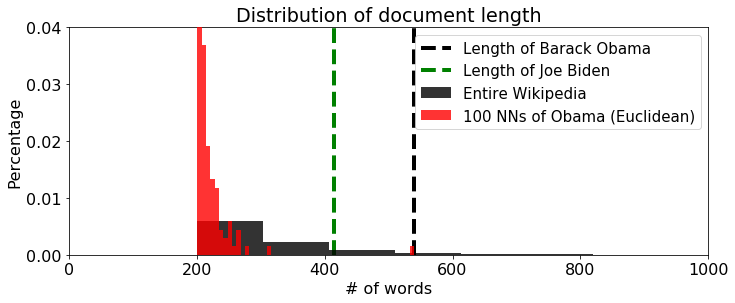

In [497]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', 
         normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbor_euclidean['length'], 50, color='r', edgecolor='None',
         histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].iloc[0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].iloc[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

### Cosine distances

In [498]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [499]:
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)

neighbors = pd.DataFrame({'distance':distances.flatten(), 'id':indices.flatten()})

nearest_neighbor_cosine = neighbors.merge(wiki, left_on='id', right_index=True)[['id', 'name', 'length', 'distance']]
nearest_neighbor_cosine.head(n=20)

,id,name,length,distance
0,35817,Barack Obama,540,0.000000
1,24478,Joe Biden,414,0.703139
2,38376,Samantha Power,310,0.742982
3,57108,Hillary Rodham Clinton,580,0.758358
4,38714,Eric Stern (politician),255,0.770561
5,46140,Robert Gibbs,257,0.784678
6,6796,Eric Holder,232,0.788039
7,44681,Jesse Lee (politician),216,0.790926
8,18827,Henry Waxman,279,0.798323
9,2412,Joe the Plumber,217,0.799466


/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 756x324 with 0 Axes>

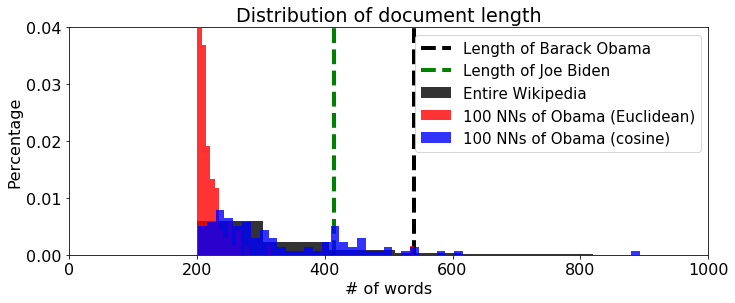

In [500]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbor_euclidean['length'], 50, color='r', edgecolor='None', 
         histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbor_cosine['length'], 50, color='b', edgecolor='None', 
         histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].iloc[0], color='k', 
            linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].iloc[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()